Linear SVM CLassification

In [1]:
#Soft margin Classification

#If your SVM model is overfitting,, uou can try regularizing it by reducing the C.

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#X = load_iris()['data'][:,(2,3)]
#y = (load_iris()['target'] == 2).astype(float)

In [9]:
svm_clf = Pipeline([('scaler',StandardScaler()),('linear_svc',SVC(kernel='linear',C=1))])

In [10]:
svm_clf.fit(X,y)
svm_clf.predict([[5.5,1.7]])

array([1.])

Nonlinear SVM Classifier

In [7]:
#Incase the data is not linearly separable
#we can easily add the polynomial features and retrain the dataset

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

X,y = make_moons(n_samples=100, noise=0.15)

poly_svm_clf = Pipeline([('poly_features',PolynomialFeatures(degree=3)),('std_scaler',StandardScaler()),('svm_clf',SVC(kernel='linear',C=10))])

In [48]:
poly_svm_clf.fit(X,y)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, kernel='linear'))])

In [49]:
poly_svm_clf.classes_

array([0, 1])

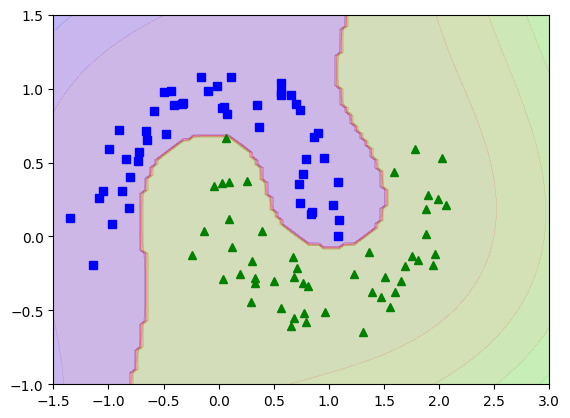

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')

x0s = np.linspace(-1.5,3,100)
x1s = np.linspace(-1,1.5,100)

x0,x1 = np.meshgrid(x0s,x1s)
X = np.c_[x0.ravel(), x1.ravel()]

y_pred = poly_svm_clf.predict(X).reshape(x0.shape)
y_decision = poly_svm_clf.decision_function(X).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

Polynomial Kernel

In [56]:
#simulating kernels without having to ad d them
#also known as kernel trick

In [57]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([('scaler',StandardScaler()),('svm_clf',SVC(kernel='poly', degree=3, coef0=1, C=5))])

In [8]:
X, y= make_moons(n_samples=100, noise=0.20)

In [59]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [ ]:
#LinearSVC is much faster than SVC(kernel='linear')

Similarity Features

In [1]:
#Radial Basis Function

#ϕγ (x, ℓ) = exp(−γ∥x − ℓ∥ )

#Where l is the landmark position 

In [4]:
#Using Gaussian RBF Kernel

from sklearn.svm import LinearSVC

rbf_kernel_svm_clf = Pipeline([('scaler',StandardScaler()),('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))])

In [5]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Computational Complexity

In [2]:
#For this the training time gets extremely high when there are hundreds and thousands of inxtances

SVM Regression

As mentioned earlier, the SVM algorithm is versatile: not only does it support linear and
nonlinear classification, but it also supports linear and nonlinear regression. To use SVMs
for regression instead of classification, the trick is to reverse the objective: instead of
trying to fit the largest possible street between two classes while limiting margin
violations, SVM Regression tries to fit as many instances as possible on the street while
limiting margin violations (i.e., instances off the street). The width of the street is
controlled by a hyperparameter, ϵ. Figure 5-10 shows two linear SVM Regression models
trained on some random linear data, one with a large margin (ϵ = 1.5) and the other with a
small margin (ϵ = 0.5).

In [10]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [11]:
#To tacke polynomial functions we can add the degree

#for example

from sklearn.svm import SVR

svm_poly_reg = SVR(degree=2,kernel='poly',C=100, epsilon=0.1)

In [12]:
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

Online Learning

In [13]:
#Typically online learning means learning incrementally ie learning as the data arrives

Excercises

In [14]:
#1 the idea behind SVM lies in the fact that it should create a support
#vector which will distinguish between two or more classes in the target vector

#2 Support vector is the path along with its margins which classifies two different properties

#3If not scaled the support vector can be highly biased towards higher or lower values

#4



#5 primal form of svm should be used to train a model with millions of instances cos it can make 
#use of the kernel trick that can save a lot of training time

#6 Say we trained with a gaussian kernel the gamma is a local point for an instance,
#increasing the gamma or the local point will definitely improve the model fit


#7


In [147]:
#8

#Generating a linearly separable dataset
import matplotlib.pyplot as plt
%matplotlib inline
X1 = 2*np.random.rand(100,1)
X2 = 3*np.random.rand(100,1)

X3 = 5*np.random.rand(100,1) + 2.5
X4 = 7*np.random.rand(100,1) + 2.5

In [148]:
A = np.c_[X1.ravel(), X2.ravel(),np.ones_like(X1)]
B = np.c_[X3.ravel(), X4.ravel(),np.zeros_like(X1)]

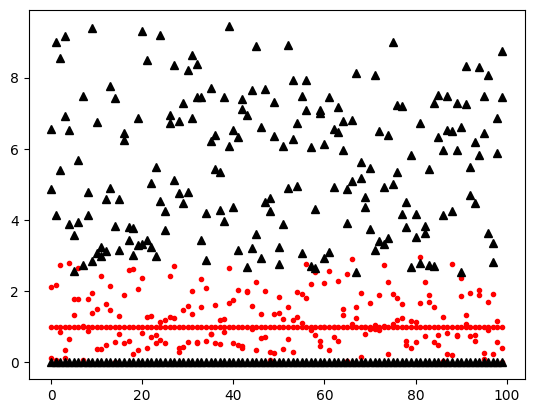

In [149]:
plt.plot(A,'r.')
plt.plot(B,'k^')

In [150]:
data = np.concatenate((A,B),axis=0)

In [151]:

#shuffling the data
np.random.shuffle(data)
len(data)

200

In [152]:
#extracting x and y
y = data[:,2].reshape(200,1)
X = data[:,:2].reshape(200,2)

In [153]:
#Import the models and preprocessing tools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=45)

In [154]:
#We will create three pipelines and fit the data

linsvc = Pipeline([('Scaler',StandardScaler()),('LinearSVC',LinearSVC(loss='hinge'))])
svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(kernel = 'linear'))])
sgd = Pipeline([('Scaler',StandardScaler()),('SGD',SGDClassifier())])

linsvc.fit(X,y.ravel()), svc.fit(X,y.ravel()), sgd.fit(X,y.ravel())

(Pipeline(steps=[('Scaler', StandardScaler()),
                 ('LinearSVC', LinearSVC(loss='hinge'))]),
 Pipeline(steps=[('Scaler', StandardScaler()), ('SVC', SVC(kernel='linear'))]),
 Pipeline(steps=[('Scaler', StandardScaler()), ('SGD', SGDClassifier())]))

In [155]:
#Now we will predict the data

linsvc_pred, svc_pred, sgd_pred = linsvc.predict(X_test), svc.predict(X_test), sgd.predict(X_test)

In [156]:
#Now we will import the scoring parameters and check the data

from sklearn.metrics import confusion_matrix,classification_report,f1_score

f1_score(y_test,linsvc_pred), f1_score(y_test,svc_pred), f1_score(y_test,sgd_pred)

(1.0, 1.0, 1.0)

In [157]:
confusion_matrix(y_test, linsvc_pred)

array([[20,  0],
       [ 0, 20]])

In [2]:
#9
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml(name='mnist_784', version='active')

In [4]:
data = mnist.data

In [14]:
import numpy as np
data = np.array(data)
y = np.array(mnist.target)
len(y)

70000

Text(0.5, 1.0, 'Zero 0')

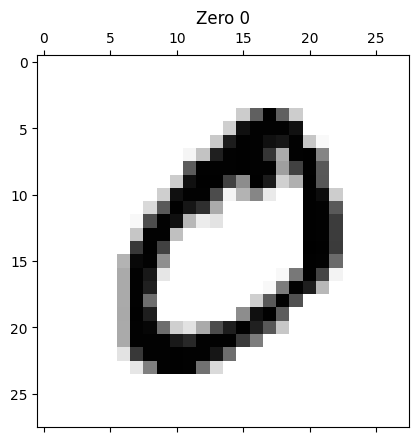

In [8]:
#Reshaping to plot the data and make it understandable
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(data[1].reshape(28,28),cmap='binary')
plt.title(f'Zero {y[1]}')

In [15]:
#Since the data will take large amount of time to train lets take the first 3000 of the datasets

X_train = data[:3000]
y_train = y[:3000]
X_test = data[3000:3600]
y_test = y[3000:3600]

In [16]:
for i in [X_train,X_test,y_train,y_test]:
    print(len(i))

3000
600
3000
600


In [18]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [20]:
#For simplicity lets make it into a simple train test split without any validation

from sklearn.svm import SVC

svc_clf = SVC(decision_function_shape='ovr') 

In [21]:
svc_clf.fit(X_train, y_train)

SVC()

In [25]:
y_pred = svc_clf.predict(X_test)


In [30]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='macro')

0.952072945243988

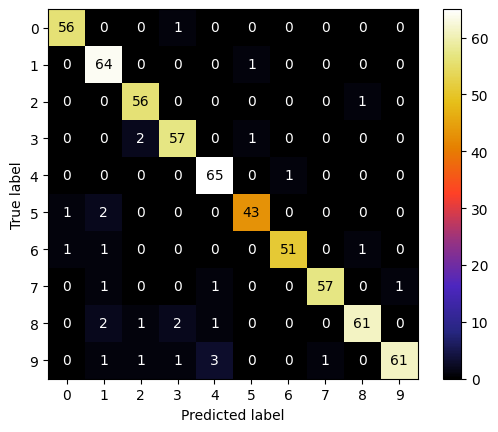

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred,labels=svc_clf.classes_)
conf_mat
disp = ConfusionMatrixDisplay(conf_mat,display_labels=svc_clf.classes_)
disp.plot(cmap='CMRmap')

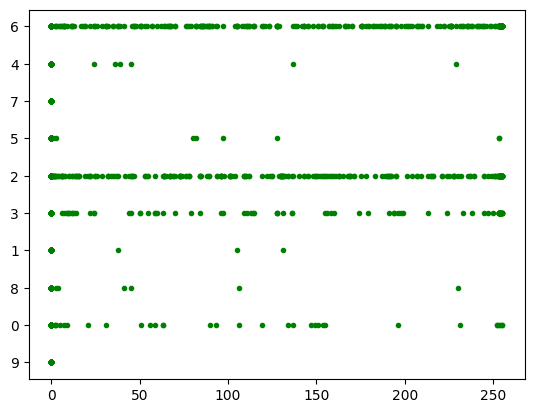

In [64]:
plt.plot(X_test[:,:123],y_test,'g.')

In [1]:
import torch

In [4]:
!nvidia-smi

Tue Nov  8 22:09:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.76       Driver Version: 515.76       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   60C    P0    N/A /  N/A |    604MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------